## Gurobi example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the **MILPRouter with Gurobi solver**.

In [1]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter, load_repository

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

### Initialize Gwynt y Mor

> Note: the `load_repository()` functionality of `OptiWindNet` is used to load a prebuilt *Networkx.Graph* of the avaible locations. For more details on this functionality look into the notebook about [Load repositories containing location data](a03_load_repositories.ipynb).

In [3]:
locations = load_repository()
wfn = WindFarmNetwork(L=locations.gwynt, cables=6)

<Axes: >

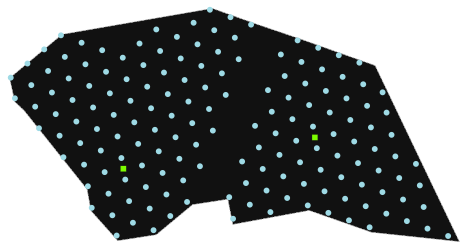

In [4]:
wfn.plot_location()

### Optimize Gwynt y Mor

Warmstart with `EWRouter`:

In [5]:
res_warmstart= wfn.optimize(router=EWRouter())

In [6]:
wfn.length()

138539.07480132734

In [7]:
milp_router = MILPRouter(solver_name='gurobi', time_limit=90, mip_gap=0.005, verbose=True)
res = wfn.optimize(router=milp_router)

>>> Using warm start: the model is initialized with the provided solution S <<<
Set parameter OutputFlag to value 1
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  90
MIPGap  0.005
MIPFocus  1

Academic license 2690479 - for non-commercial use only - registered to am___@dtu.dk
Optimize a model with 5938 rows, 3976 columns and 22544 nonzeros
Model fingerprint: 0xb69f3d91
Variable types: 0 continuous, 3976 integer (1988 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [4e+02, 1e+04]
  Bounds range     [1e+00, 6e+00]
  RHS range        [1e+00, 2e+02]

Loaded user MIP start with objective 138349

Presolve removed 757 rows and 0 columns
Presolve time: 0.10s
Presolved: 5181 rows, 3976 columns, 19044 nonzeros
Variabl

In [8]:
wfn.G.SolutionInfo

SolutionInfo(runtime=90.10899996757507, bound=126604.51273026993, objective=129668.96082109504, relgap=0.023632857635476512, termination='maxTimeLimit')

In [9]:
wfn.length()

129668.96082109504

<Axes: >

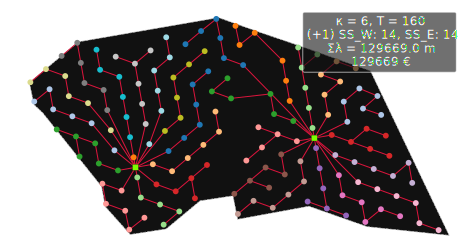

In [10]:
wfn.plot()